In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Classification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms will do the job, but while classifying a large dataset of images, you will need to use a neural network. If you have never trained a neural network and want to learn how neural networks work, you can learn everything about a neural network.


Now let’s come back to classification with neural networks. In this section, I will take you through the task of image classification with neural network using Python. Here, I will be using the famous MNIST fashion dataset, which contains 70,000 clothing fashion images. Here our task is to train an image classification model with neural networks.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 5


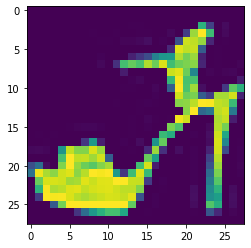

In [ ]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7183 - accuracy: 0.7670 - val_loss: 0.5035 - val_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4846 - accuracy: 0.8301 - val_loss: 0.4375 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4413 - accuracy: 0.8447 - val_loss: 0.4229 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4134 - accuracy: 0.8552 - val_loss: 0.3934 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3943 - accuracy: 0.8601 - val_loss: 0.3795 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3779 - accuracy: 0.8660 - val_loss: 0.3878 - val_accuracy: 0.8602
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3655 - accuracy: 0.8725 - val_loss: 0.3554 - val_accurac

In [ ]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 88ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
